In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("winequality-red.csv")

In [2]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [4]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
df.duplicated().sum()

240

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

## Scaling not required in Decision Tree

Because it doesn't affect

In [9]:
"""from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit()
scaler.transform()"""

'from sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\nscaler.fit()\nscaler.transform()'

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
model.score(X_train, y_train)

1.0

> Model is overfitted

[Text(0.5004371279761904, 0.9761904761904762, 'X[10] <= 10.15\ngini = 0.652\nsamples = 910\nvalue = [5, 38, 385, 354, 115, 13]'),
 Text(0.3077856316137566, 0.9285714285714286, 'X[6] <= 91.5\ngini = 0.53\nsamples = 462\nvalue = [4, 24, 288, 129, 15, 2]'),
 Text(0.1605448082010582, 0.8809523809523809, 'X[1] <= 0.417\ngini = 0.575\nsamples = 377\nvalue = [4, 23, 212, 121, 15, 2]'),
 Text(0.07195767195767196, 0.8333333333333334, 'X[9] <= 0.655\ngini = 0.622\nsamples = 84\nvalue = [0, 2, 30, 41, 9, 2]'),
 Text(0.03597883597883598, 0.7857142857142857, 'X[4] <= 0.079\ngini = 0.52\nsamples = 47\nvalue = [0, 1, 24, 22, 0, 0]'),
 Text(0.021164021164021163, 0.7380952380952381, 'X[5] <= 31.5\ngini = 0.475\nsamples = 18\nvalue = [0, 1, 5, 12, 0, 0]'),
 Text(0.016931216931216932, 0.6904761904761905, 'X[7] <= 0.996\ngini = 0.398\nsamples = 16\nvalue = [0, 1, 3, 12, 0, 0]'),
 Text(0.012698412698412698, 0.6428571428571429, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.0211640211640211

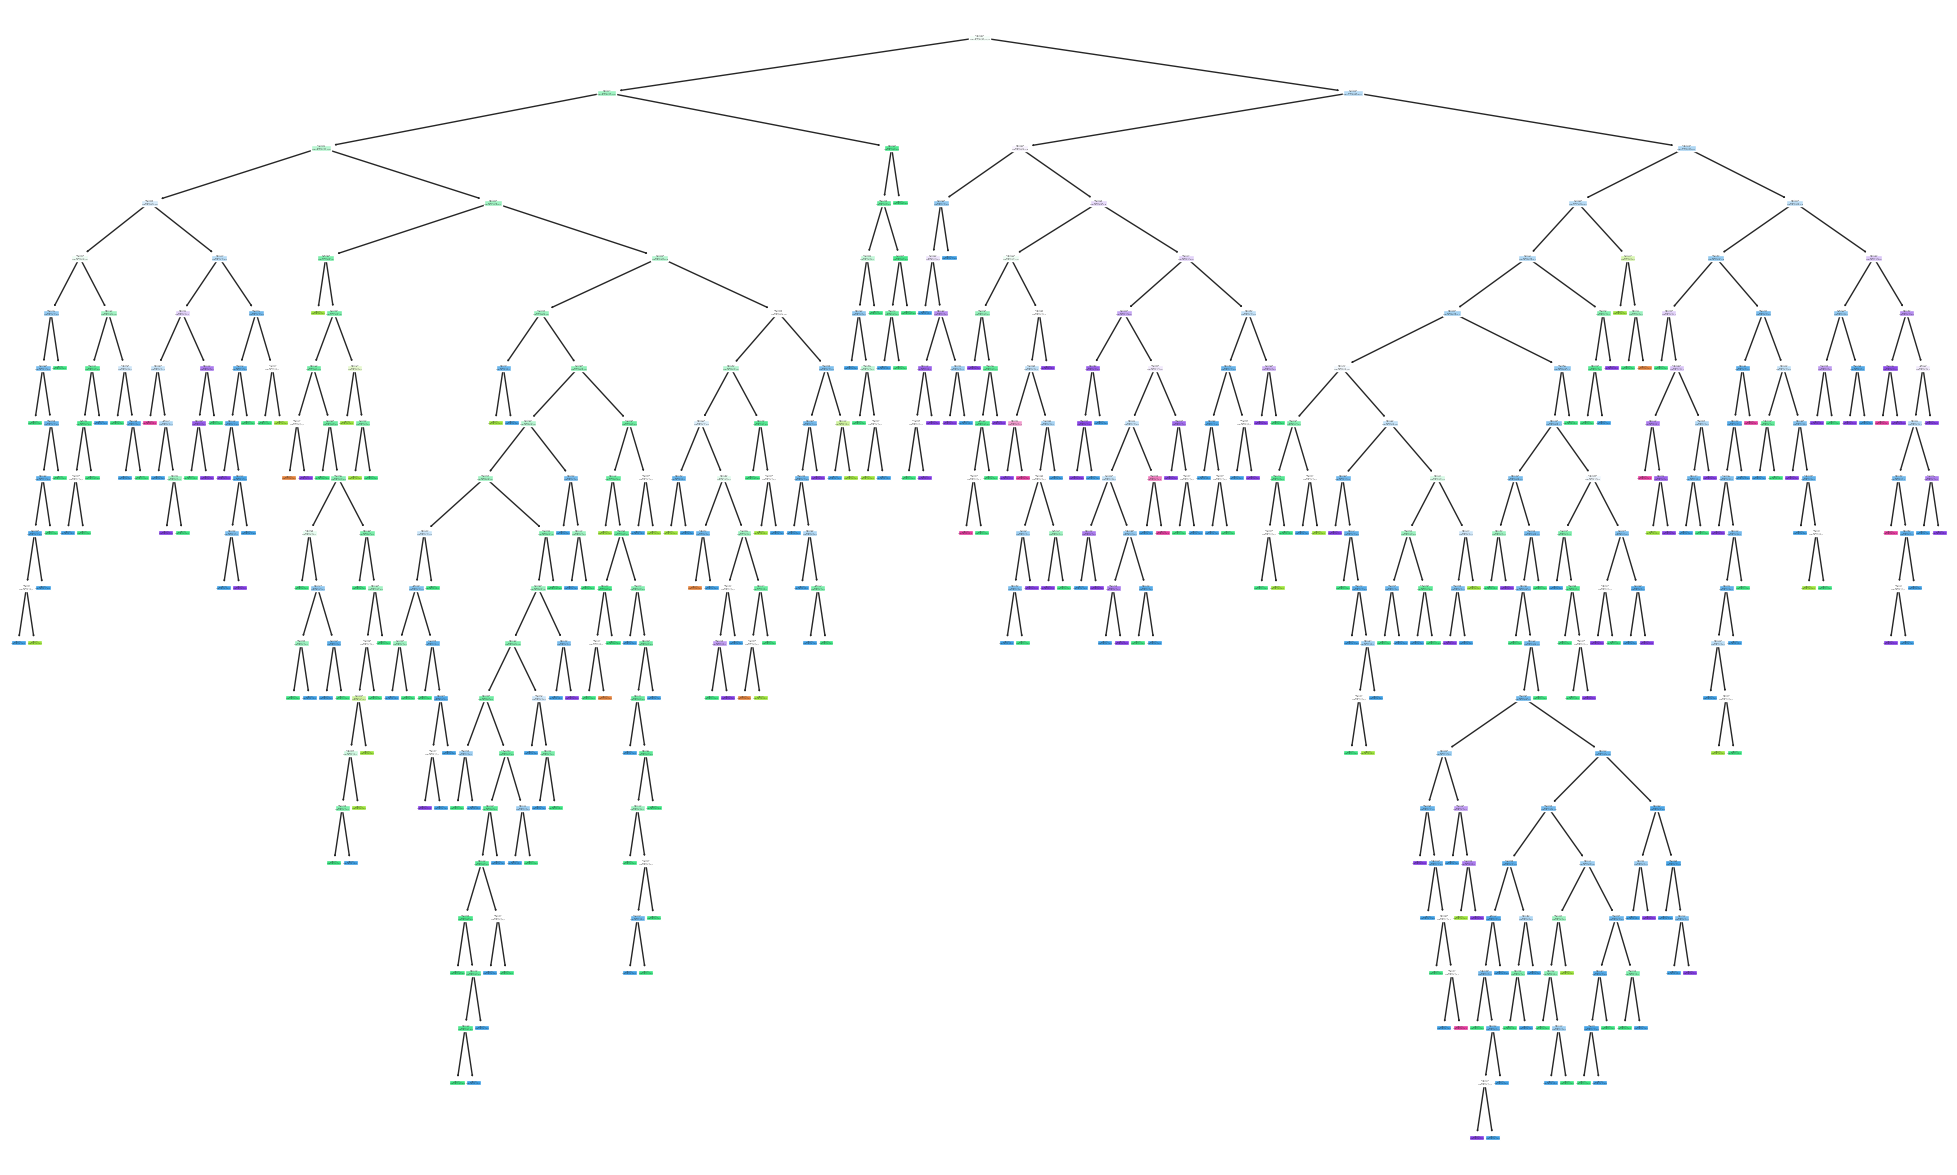

In [13]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,15))
tree.plot_tree(model,filled=True)

In [14]:
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.46993318485523383

> Dummy model!

It's an overfit model because training accuracy is very high and test accuracy is very low

# Hyperparameter Tuning

In [16]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter': ['best', 'random']
}


In [17]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model, param_grid=grid_param, cv=5)

In [18]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [19]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'splitter': 'random'}

In [26]:
model_with_best_params = DecisionTreeClassifier(criterion='entropy',
                                                max_depth=4,
                                                min_samples_leaf=2,
                                                min_samples_split=8,
                                                splitter='random')

In [27]:
model_with_best_params.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       min_samples_split=8, splitter='random')

In [28]:
y_pred2 = model_with_best_params.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred2)

0.5812917594654788

# Our Accuracy improved!

# PLotting Tree

Controlling the depth of tree

[Text(0.5431034482758621, 0.9, 'X[10] <= 10.544\nentropy = 1.752\nsamples = 910\nvalue = [5, 38, 385, 354, 115, 13]'),
 Text(0.27586206896551724, 0.7, 'X[1] <= 0.441\nentropy = 1.473\nsamples = 562\nvalue = [4, 26, 325, 179, 26, 2]'),
 Text(0.13793103448275862, 0.5, 'X[10] <= 9.667\nentropy = 1.551\nsamples = 158\nvalue = [0, 2, 68, 69, 17, 2]'),
 Text(0.06896551724137931, 0.3, 'X[0] <= 14.062\nentropy = 1.144\nsamples = 69\nvalue = [0, 1, 42, 25, 1, 0]'),
 Text(0.034482758620689655, 0.1, 'entropy = 1.043\nsamples = 67\nvalue = [0, 1, 42, 24, 0, 0]'),
 Text(0.10344827586206896, 0.1, 'entropy = 1.0\nsamples = 2\nvalue = [0, 0, 0, 1, 1, 0]'),
 Text(0.20689655172413793, 0.3, 'X[2] <= 0.665\nentropy = 1.662\nsamples = 89\nvalue = [0, 1, 26, 44, 16, 2]'),
 Text(0.1724137931034483, 0.1, 'entropy = 1.618\nsamples = 85\nvalue = [0, 1, 26, 42, 15, 1]'),
 Text(0.2413793103448276, 0.1, 'entropy = 1.5\nsamples = 4\nvalue = [0, 0, 0, 2, 1, 1]'),
 Text(0.41379310344827586, 0.5, 'X[6] <= 73.099\nentr

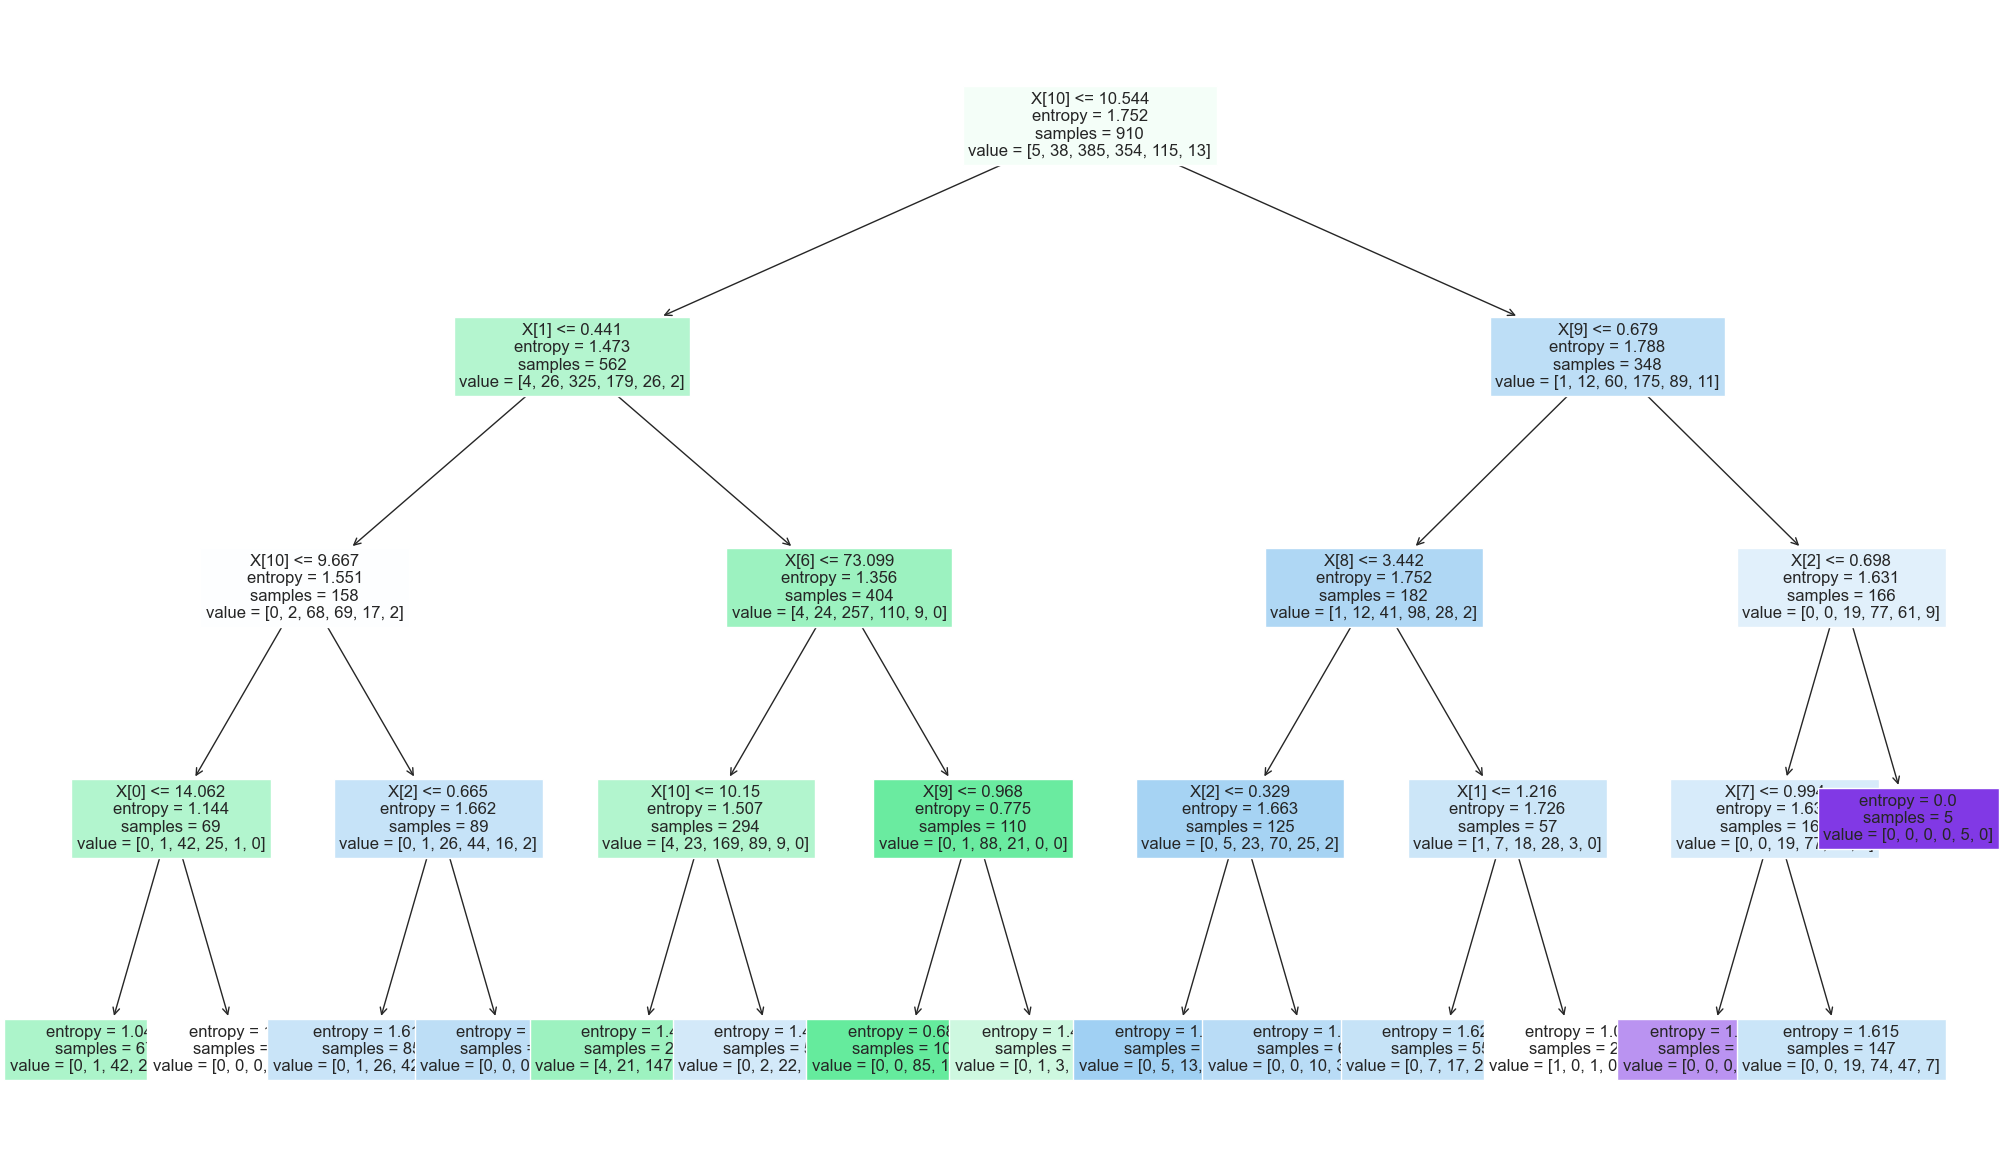

In [30]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_params, filled=True, fontsize=12)

In [25]:
fig.savefig("Decision_Tree_Classifier.png")

# Random Forest CLassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
Rf_model = RandomForestClassifier()

In [33]:
Rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
y_pred_rf = Rf_model.predict(X_test)

In [36]:
accuracy_score(y_test, y_pred_rf)

0.6325167037861915

### Accuracy is more as compared to Decision Tree

In [37]:
grid_param_rf = {
    'n_estimators' : [90,100],
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2,20,1),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features': ['auto', 'log2']
}

In [38]:
from sklearn.model_selection import GridSearchCV

grid_search_rf = GridSearchCV(estimator=Rf_model, param_grid=grid_param_rf, cv=3, verbose=2, n_jobs=-1)   # n_jobs shows the power it will use of system

In [39]:
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 10368 candidates, totalling 31104 fits


C:\Users\Himz\anaconda3\envs\EDA\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [90, 100]},
             verbose=2)

In [40]:
grid_search_rf.best_params_

{'criterion': 'gini',
 'max_depth': 13,
 'max_features': 'auto',
 'min_samples_leaf': 7,
 'min_samples_split': 6,
 'n_estimators': 90}

In [41]:
model_rf_better = RandomForestClassifier(criterion='gini', max_depth=13,
                                         max_features='auto', min_samples_leaf=7,
                                         min_samples_split=6, n_estimators=90)

In [42]:
model_rf_better.fit(X_train, y_train)

C:\Users\Himz\anaconda3\envs\EDA\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=13, max_features='auto', min_samples_leaf=7,
                       min_samples_split=6, n_estimators=90)

In [43]:
y_pred_rf_better = model_rf_better.predict(X_test)

In [44]:
accuracy_score(y_test, y_pred_rf_better)

0.6525612472160356

## Better Accuracy after Hyperparameter Tuning

> ## For ensembling we can use BaggingClassifier to ensemble various models

In [45]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

modelbagging_svc = BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=50,
    random_state=0
)

In [50]:
modelbagging_svc.fit(X_train, y_train)
y_pred_bag = modelbagging_svc.predict(X_test)

In [51]:
accuracy_score(y_test, y_pred_bag)

0.5100222717149221

### We got 51% Accuracy with SVC Ensembling

# In order to use multiple models for ensembling use VotingClassifier

------------------------

# ADABOOST

In [16]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

In [17]:
model.fit(X_train, y_train)

AdaBoostClassifier()

In [18]:
model.fit(X_train, y_train)

AdaBoostClassifier()

In [19]:
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5367483296213809

In [21]:
grid_param = {
    'n_estimators' : [90,100,130,150],
    'learning_rate':[0.001, 0.01, 0.1, 0.5]
}

In [23]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(param_grid=grid_param, estimator=model,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

In [24]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5],
                         'n_estimators': [90, 100, 130, 150]},
             verbose=2)

In [25]:
grid.best_params_

{'learning_rate': 0.01, 'n_estimators': 90}

In [26]:
model_better = AdaBoostClassifier(learning_rate=0.01,
                                  n_estimators=90)

In [27]:
model_better.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=90)

In [28]:
y_ada_pred = model_better.predict(X_test)

In [29]:
accuracy_score(y_test, y_ada_pred)

0.5567928730512249